In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

### Extract target column: total days spent in ICU

In [25]:
icu_days = pd.read_csv('MIMIC2csv/icustay_days.csv')
icu_days.head()

,icustay_id,subject_id,seq,begintime,endtime,first_day_flg,last_day_flg
0,62,56,1,17/1/2644 02:02:00,18/1/2644 02:01:59,Y,N
1,62,56,2,18/1/2644 02:02:00,18/1/2644 22:25:00,N,Y
2,41,37,1,16/8/3264 11:01:00,17/8/3264 11:00:59,Y,N
3,41,37,2,17/8/3264 11:01:00,17/8/3264 14:22:00,N,Y
4,89,78,1,24/3/2778 04:10:00,25/3/2778 04:09:59,Y,N
...,...,...,...,...,...,...,...
34823,47473,32763,28,5/7/2724 15:11:00,6/7/2724 15:10:59,N,N
34824,47473,32763,29,6/7/2724 15:11:00,7/7/2724 15:10:59,N,N
34825,47473,32763,30,7/7/2724 15:11:00,8/7/2724 15:10:59,N,N
34826,47473,32763,31,8/7/2724 15:11:00,9/7/2724 15:10:59,N,N


In [27]:
re_ind = icu_days.set_index(['icustay_id','subject_id'])
re_ind.head()

seq           begintime             endtime  \
icustay_id subject_id                                                
62         56            1  17/1/2644 02:02:00  18/1/2644 02:01:59   
           56            2  18/1/2644 02:02:00  18/1/2644 22:25:00   
41         37            1  16/8/3264 11:01:00  17/8/3264 11:00:59   
           37            2  17/8/3264 11:01:00  17/8/3264 14:22:00   
89         78            1  24/3/2778 04:10:00  25/3/2778 04:09:59   
...                    ...                 ...                 ...   
47473      32763        28   5/7/2724 15:11:00   6/7/2724 15:10:59   
           32763        29   6/7/2724 15:11:00   7/7/2724 15:10:59   
           32763        30   7/7/2724 15:11:00   8/7/2724 15:10:59   
           32763        31   8/7/2724 15:11:00   9/7/2724 15:10:59   
           32763        32   9/7/2724 15:11:00   9/7/2724 17:20:00   

                      first_day_flg last_day_flg  
icustay_id subject_id                             
62         56                     Y            N  
           56                     N            Y  
41         37                     Y            N  
           37                     N            Y  
89         78                     Y            N  
...                             ...          ...  
47473      32763                  N            N  
           32763                  N            N  
           32763                  N            N  
           32763                  N            N  
           32763                  N            Y  

[34828 rows x 5 columns]

In [28]:
icu_subject = list(re_ind.index)

In [12]:
def removeDuplicates(lst):
      
    return list(set([i for i in lst]))

In [30]:
icu_subject = removeDuplicates(icu_subject)

In [317]:
%%time 

target_ICUstay = pd.DataFrame()
for i in range(0,len(icu_subject)):
    x = (re_ind.loc[icu_subject[i]]) 
    target_ICUstay = target_ICUstay.append(x[(x.seq == x.seq.max())])
    
target_ICUstay = target_ICUstay.drop(labels= ['begintime','endtime','first_day_flg','last_day_flg'],axis=1)
target_ICUstay.head()

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel

CPU times: user 35.9 s, sys: 1.39 s, total: 37.3 s
Wall time: 44.3 s


/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel

,,seq
icustay_id,subject_id,
21972,17655,14
17760,14291,4
2315,1882,2
20962,16847,5
26859,21583,1


In [37]:
target_ICUstay.dtypes

seq    int64
dtype: object

<AxesSubplot:xlabel='seq', ylabel='Count'>

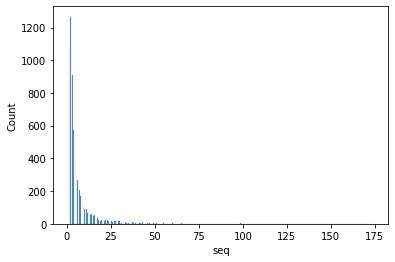

In [433]:
sns.histplot(target_ICUstay.seq)

### Extract number of chart items 

In [75]:
chart_dur = pd.read_csv('MIMIC2csv/a_chartdurations.csv')
chart_dur.head()

,subject_id,icustay_id,itemid,elemid,starttime,startrealtime,endtime,cuid,duration
0,26,29.0,478,0,4/3/3079 09:00:00,4/3/3079 09:37:00,6/3/3079 12:15:00,1,3075.0
1,26,29.0,1706,0,4/3/3079 09:00:00,4/3/3079 09:37:00,6/3/3079 12:15:00,1,3075.0
2,26,29.0,1623,0,4/3/3079 09:00:00,4/3/3079 09:37:00,6/3/3079 12:15:00,1,3075.0
3,26,29.0,1622,0,4/3/3079 09:00:00,4/3/3079 09:37:00,6/3/3079 12:15:00,1,3075.0
4,26,29.0,1517,0,4/3/3079 09:00:00,4/3/3079 09:37:00,6/3/3079 12:15:00,1,3075.0


In [78]:
chart_dur = chart_dur[chart_dur.icustay_id.notna()]
chart_dur.icustay_id = chart_dur.icustay_id.astype(np.int64)

In [86]:
re_ind_chart_dur = chart_dur.set_index(['icustay_id','subject_id'])
re_ind_chart_dur.head()

itemid  elemid          starttime      startrealtime  \
icustay_id subject_id                                                         
29         26             478       0  4/3/3079 09:00:00  4/3/3079 09:37:00   
           26            1706       0  4/3/3079 09:00:00  4/3/3079 09:37:00   
           26            1623       0  4/3/3079 09:00:00  4/3/3079 09:37:00   
           26            1622       0  4/3/3079 09:00:00  4/3/3079 09:37:00   
           26            1517       0  4/3/3079 09:00:00  4/3/3079 09:37:00   

                                 endtime  cuid  duration  
icustay_id subject_id                                     
29         26          6/3/3079 12:15:00     1    3075.0  
           26          6/3/3079 12:15:00     1    3075.0  
           26          6/3/3079 12:15:00     1    3075.0  
           26          6/3/3079 12:15:00     1    3075.0  
           26          6/3/3079 12:15:00     1    3075.0

In [87]:
chart_subject = list(re_ind_chart_dur.index)
chart_subject = removeDuplicates(chart_subject)

In [117]:
no_chart_feature = pd.DataFrame(columns = ['icustay_id','subject_id','no_chart_items'])

for i in range(0,len(chart_subject)):
    no_chart_feature = no_chart_feature.append({'icustay_id': chart_subject[i][0], 'subject_id': chart_subject[i][1], 'no_chart_items': len(re_ind_chart_dur.loc[chart_subject[i]])}, ignore_index=True)
    
no_chart_feature = no_chart_feature.set_index(['icustay_id','subject_id'])

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


In [118]:
no_chart_feature.head()

,,no_chart_items
icustay_id,subject_id,
14932,11962,389
19043,15330,147
21972,17655,383
2860,2297,109
21377,17167,220


### Intraosseous infusion (IO) duration 

In [178]:
io_dur = pd.read_csv('MIMIC2csv/a_iodurations.csv')
io_dur.head()

#  Intraosseous infusion (IO) is the process of injecting medications, 
# fluids, or blood products directly into the marrow of a bone

,subject_id,icustay_id,itemid,elemid,starttime,startrealtime,endtime,cuid,duration
0,3,4.0,55,1,8/9/2682 00:00:00,8/9/2682 04:26:00,13/9/2682 19:45:00,69,8385.0
1,3,4.0,59,1,9/9/2682 23:00:00,9/9/2682 23:39:00,13/9/2682 19:45:00,69,5565.0
2,3,4.0,104,1,8/9/2682 02:00:00,8/9/2682 04:38:00,13/9/2682 19:45:00,69,8265.0
3,3,4.0,128,1,10/9/2682 19:00:00,10/9/2682 19:22:00,13/9/2682 19:45:00,69,4365.0
4,3,4.0,134,1,7/9/2682 23:00:00,8/9/2682 04:42:00,13/9/2682 19:45:00,69,8445.0


In [179]:
io_dur.dtypes

subject_id         int64
icustay_id       float64
itemid             int64
elemid             int64
starttime         object
startrealtime     object
endtime           object
cuid               int64
duration         float64
dtype: object

In [180]:
io_dur.isnull().sum()

subject_id          0
icustay_id       3769
itemid              0
elemid              0
starttime           0
startrealtime       0
endtime          8370
cuid                0
duration         8370
dtype: int64

In [181]:
io_dur = io_dur[io_dur.icustay_id.notna()]
io_dur.icustay_id = io_dur.icustay_id.astype(np.int64)

re_ind_io_dur = io_dur.set_index(['icustay_id','subject_id'])
re_ind_io_dur.head()

itemid  elemid           starttime       startrealtime  \
icustay_id subject_id                                                           
4          3               55       1   8/9/2682 00:00:00   8/9/2682 04:26:00   
           3               59       1   9/9/2682 23:00:00   9/9/2682 23:39:00   
           3              104       1   8/9/2682 02:00:00   8/9/2682 04:38:00   
           3              128       1  10/9/2682 19:00:00  10/9/2682 19:22:00   
           3              134       1   7/9/2682 23:00:00   8/9/2682 04:42:00   

                                  endtime  cuid  duration  
icustay_id subject_id                                      
4          3           13/9/2682 19:45:00    69    8385.0  
           3           13/9/2682 19:45:00    69    5565.0  
           3           13/9/2682 19:45:00    69    8265.0  
           3           13/9/2682 19:45:00    69    4365.0  
           3           13/9/2682 19:45:00    69    8445.0

In [182]:
re_ind_io_dur.shape

(69805, 7)

In [183]:
io_subject = list(re_ind_io_dur.index)
io_subject = removeDuplicates(io_subject)

In [186]:
io_dur_feature = pd.DataFrame(columns = ['icustay_id','subject_id','total_dur_min'])

for i in range(0,len(io_subject)):
    io_dur_feature = io_dur_feature.append({'icustay_id': io_subject[i][0], 'subject_id': io_subject[i][1], 'total_dur_min': re_ind_io_dur.loc[io_subject[i]].duration.sum()}, ignore_index=True)

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


In [187]:
io_dur_feature = io_dur_feature.astype(np.int64)

In [188]:
io_dur_feature = io_dur_feature.set_index(['icustay_id','subject_id'])
io_dur_feature.head()

,,total_dur_min
icustay_id,subject_id,
14932,11962,18030
19043,15330,32783
21972,17655,97125
31282,25184,146541
24421,19589,10985


### Med durations 

In [127]:
med_dur = pd.read_csv('MIMIC2csv/a_meddurations.csv')
med_dur.head()

,subject_id,icustay_id,itemid,elemid,starttime,startrealtime,endtime,cuid,duration
0,3,4.0,25,1,8/9/2682 17:30:00,8/9/2682 17:47:00,9/9/2682 02:00:00,69,510.0
1,3,4.0,25,1,9/9/2682 07:00:00,9/9/2682 07:41:00,9/9/2682 14:00:00,69,420.0
2,3,4.0,25,1,9/9/2682 15:00:00,9/9/2682 16:24:00,13/9/2682 19:45:00,69,6045.0
3,3,4.0,43,1,7/9/2682 20:00:00,7/9/2682 23:46:00,13/9/2682 19:45:00,69,8625.0
4,3,4.0,48,1,7/9/2682 20:00:00,8/9/2682 01:57:00,13/9/2682 19:45:00,69,8625.0


In [169]:
med_dur.isnull().sum()

subject_id          0
icustay_id       1525
itemid              0
elemid              0
starttime           0
startrealtime       0
endtime          3541
cuid                0
duration         3541
dtype: int64

In [170]:
med_dur = med_dur[med_dur.icustay_id.notna()]
med_dur.icustay_id = med_dur.icustay_id.astype(np.int64)

re_ind_med_dur = med_dur.set_index(['icustay_id','subject_id'])
re_ind_med_dur.head()

itemid  elemid          starttime      startrealtime  \
icustay_id subject_id                                                         
4          3               25       1  8/9/2682 17:30:00  8/9/2682 17:47:00   
           3               25       1  9/9/2682 07:00:00  9/9/2682 07:41:00   
           3               25       1  9/9/2682 15:00:00  9/9/2682 16:24:00   
           3               43       1  7/9/2682 20:00:00  7/9/2682 23:46:00   
           3               48       1  7/9/2682 20:00:00  8/9/2682 01:57:00   

                                  endtime  cuid  duration  
icustay_id subject_id                                      
4          3            9/9/2682 02:00:00    69     510.0  
           3            9/9/2682 14:00:00    69     420.0  
           3           13/9/2682 19:45:00    69    6045.0  
           3           13/9/2682 19:45:00    69    8625.0  
           3           13/9/2682 19:45:00    69    8625.0

In [171]:
med_subject = list(re_ind_med_dur.index)
med_subject = removeDuplicates(med_subject)

In [176]:
med_dur_feature = pd.DataFrame(columns = ['icustay_id','subject_id','total_dur_min'])

for i in range(0,len(med_subject)):
    med_dur_feature = med_dur_feature.append({'icustay_id': med_subject[i][0], 'subject_id': med_subject[i][1], 'total_dur_min': re_ind_med_dur.loc[med_subject[i]].duration.sum()}, ignore_index=True)

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


In [177]:
med_dur_feature.head()

,icustay_id,subject_id,total_dur_min
0,14932.0,11962.0,2190.0
1,19043.0,15330.0,22359.0
2,21972.0,17655.0,2520.0
3,31282.0,25184.0,58585.0
4,2848.0,2286.0,20109.0


In [190]:
med_dur_feature = med_dur_feature.astype(np.int64)
med_dur_feature = med_dur_feature.set_index(['icustay_id','subject_id'])
med_dur_feature.head()

,,total_dur_min
icustay_id,subject_id,
14932,11962,2190
19043,15330,22359
21972,17655,2520
31282,25184,58585
2848,2286,20109


### Additives

In [128]:
additives = pd.read_csv('MIMIC2csv/additives.csv')
additives.head()

,subject_id,icustay_id,itemid,ioitemid,charttime,elemid,cgid,cuid,amount,doseunits,route
0,56,NaN,26,134,17/1/2644 02:00:00,100,1084,1,20.0,mEq,Intravenous Push
1,56,62.0,50,178,17/1/2644 03:00:00,100,5692,1,50.0,mcgkgmin,IV Drip
2,56,62.0,26,134,18/1/2644 03:00:00,300,940,1,20.0,mEq,Intravenous Push
3,3,4.0,43,140,7/9/2682 22:00:00,100,-1,69,400.0,mcgkgmin,IV Drip
4,3,4.0,128,218,7/9/2682 22:00:00,100,-1,69,60.0,mcgkgmin,IV Drip


<AxesSubplot:xlabel='route', ylabel='Count'>

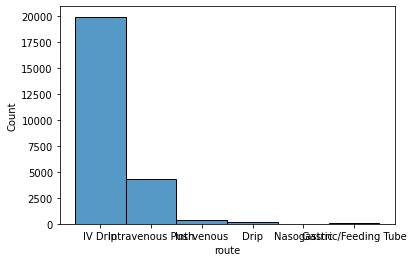

In [495]:
sns.histplot(additives.route)

<AxesSubplot:xlabel='doseunits', ylabel='Count'>

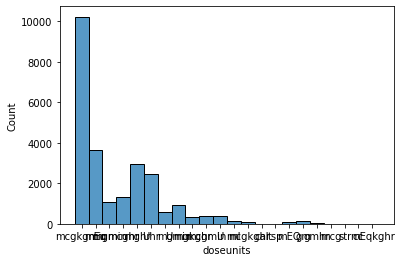

In [496]:
sns.histplot(additives.doseunits)

<AxesSubplot:xlabel='itemid', ylabel='Count'>

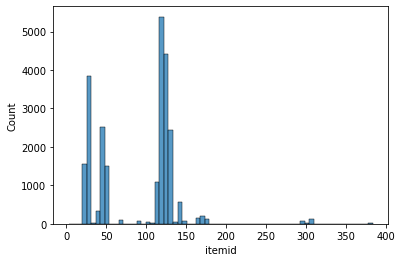

In [497]:
sns.histplot(additives.itemid)

<AxesSubplot:xlabel='elemid', ylabel='Count'>

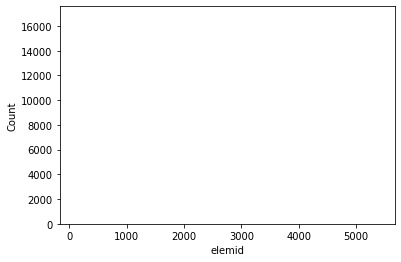

In [499]:
sns.histplot(additives.elemid)

In [193]:
additives = additives[additives.icustay_id.notna()]
additives.icustay_id = additives.icustay_id.astype(np.int64)

re_ind_additives = additives.set_index(['icustay_id','subject_id'])
re_ind_additives.head()

itemid  ioitemid           charttime  elemid  cgid  \
icustay_id subject_id                                                       
62         56              50       178  17/1/2644 03:00:00     100  5692   
           56              26       134  18/1/2644 03:00:00     300   940   
4          3               43       140   7/9/2682 22:00:00     100    -1   
           3              128       218   7/9/2682 22:00:00     100    -1   
           3               48       393   7/9/2682 22:00:00     100    -1   

                       cuid  amount doseunits             route  
icustay_id subject_id                                            
62         56             1    50.0  mcgkgmin           IV Drip  
           56             1    20.0       mEq  Intravenous Push  
4          3             69   400.0  mcgkgmin           IV Drip  
           3             69    60.0  mcgkgmin           IV Drip  
           3             69     2.0     mgmin           IV Drip

In [194]:
additives_subject = list(re_ind_additives.index)
additives_subject = removeDuplicates(additives_subject)

In [215]:
add_dose_amt_feature = pd.DataFrame(columns = ['icustay_id','subject_id','total_amt'])

for i in range(0,len(additives_subject)):
    add_dose_amt_feature = add_dose_amt_feature.append({'icustay_id': additives_subject[i][0], 'subject_id': additives_subject[i][1], 'total_amt': re_ind_additives.loc[additives_subject[i]].amount.sum()}, ignore_index=True)

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


In [217]:
add_dose_amt_feature = add_dose_amt_feature.astype(np.int64)
add_dose_amt_feature = add_dose_amt_feature.set_index(['icustay_id','subject_id'])
add_dose_amt_feature.head()

,,total_amt
icustay_id,subject_id,
14932,11962,3000
19043,15330,25000
21972,17655,2550
31282,25184,52702
2719,2195,4552


### Census events

In [130]:
census_events = pd.read_csv('MIMIC2csv/censusevents.csv')
census_events.head()

,census_id,subject_id,intime,outtime,careunit,destcareunit,dischstatus,los,icustay_id
0,2,24730,25/7/3011 17:32:00,29/7/3011 14:48:00,1,8.0,NaN,5596.0,30710.0
1,3,7234,8/8/2976 23:53:00,9/8/2976 14:45:00,1,8.0,NaN,892.0,8994.0
2,4,18687,4/7/3208 09:01:00,5/7/3208 10:18:00,1,NaN,Deceased,1517.0,23263.0
3,5,18687,5/7/3208 10:48:00,5/7/3208 12:25:00,1,NaN,No Disch Status,97.0,23263.0
4,6,18687,5/7/3208 12:37:00,5/7/3208 12:52:00,1,NaN,Deceased,15.0,23263.0


In [223]:
census_events = census_events[census_events.icustay_id.notna()]
census_events.icustay_id = census_events.icustay_id.astype(np.int64)

re_ind_census_events = census_events.set_index(['icustay_id','subject_id'])
re_ind_census_events.head()

census_id              intime             outtime  \
icustay_id subject_id                                                      
30710      24730               2  25/7/3011 17:32:00  29/7/3011 14:48:00   
8994       7234                3   8/8/2976 23:53:00   9/8/2976 14:45:00   
23263      18687               4   4/7/3208 09:01:00   5/7/3208 10:18:00   
           18687               5   5/7/3208 10:48:00   5/7/3208 12:25:00   
           18687               6   5/7/3208 12:37:00   5/7/3208 12:52:00   

                       careunit  destcareunit      dischstatus     los  
icustay_id subject_id                                                   
30710      24730              1           8.0              NaN  5596.0  
8994       7234               1           8.0              NaN   892.0  
23263      18687              1           NaN         Deceased  1517.0  
           18687              1           NaN  No Disch Status    97.0  
           18687              1           NaN         Deceased    15.0

In [224]:
census_events_subject = list(re_ind_census_events.index)
census_events_subject = removeDuplicates(census_events_subject)

In [239]:
(re_ind_census_events.loc[census_events_subject[4]].careunit.values)[0]

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


1

In [259]:
re_ind_census_events.loc[census_events_subject[3430]]

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


census_id              intime             outtime  \
icustay_id subject_id                                                      
13539      10848            6513  30/7/3016 16:44:00  31/7/3016 16:10:00   
           10848            6514  31/7/3016 16:17:00  31/7/3016 16:18:00   

                       careunit  destcareunit dischstatus     los  
icustay_id subject_id                                              
13539      10848             69           8.0         NaN  1406.0  
           10848             69           8.0         NaN     1.0

In [261]:
care_unit_feature = pd.DataFrame(columns = ['icustay_id','subject_id','care_unit'])

for i in range(0,len(census_events_subject)):
    care_unit_feature = care_unit_feature.append({'icustay_id': census_events_subject[i][0], 'subject_id': census_events_subject[i][1], 'care_unit': (re_ind_census_events.loc[census_events_subject[i]].careunit.values[0])}, ignore_index=True)

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


In [262]:
care_unit_feature.head()

,icustay_id,subject_id,care_unit
0,21972,17655,69
1,17760,14291,53
2,2315,1882,1
3,20962,16847,69
4,26859,21583,1


In [264]:
care_unit_feature = care_unit_feature.set_index(['icustay_id','subject_id'])
care_unit_feature.head()

,,care_unit
icustay_id,subject_id,
21972,17655,69
17760,14291,53
2315,1882,1
20962,16847,69
26859,21583,1


In [320]:
care_unit_feature.isnull().sum()

care_unit    0
dtype: int64

In [260]:
care_units[care_units.cuid==69]

,cuid,label
17,69,MICU


### Patients 

In [403]:
patients = pd.read_csv('MIMIC2csv/d_patients.csv')
patients.head()

,subject_id,sex,dob,dod,hospital_expire_flg
0,3,M,28/2/2606 00:00:00,2/5/2683 00:00:00,N
1,12,M,14/5/2803 00:00:00,9/10/2875 00:00:00,Y
2,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y
3,26,M,2/3/3007 00:00:00,22/12/3080 00:00:00,N
4,31,M,17/5/2606 00:00:00,29/8/2678 00:00:00,Y


In [415]:
def extractYear(x):
    import re
    result = re.search('/(.*) ', x)
    a = result.group(1)
    result2 = re.search('/(.*)', a)
    return result2.group(1)


In [299]:
patients.shape

(4000, 5)

In [418]:
patients.dob = patients.dob.apply(lambda x: extractYear(x))

In [419]:
patients.dod = patients.dod.apply(lambda x: extractYear(x))

In [423]:
patients.dtypes

subject_id              int64
sex                    object
dob                     int64
dod                     int64
hospital_expire_flg    object
dtype: object

In [422]:
patients.dob = patients.dob.astype(np.int64)
patients.dod = patients.dod.astype(np.int64)


In [428]:
patients['age']= patients.dod - patients.dob

In [431]:
patients.head()

,subject_id,sex,dob,dod,hospital_expire_flg,age
0,3,M,2606,2683,N,77
1,12,M,2803,2875,Y,72
2,21,M,3051,3139,Y,88
3,26,M,3007,3080,N,73
4,31,M,2606,2678,Y,72


In [434]:
patients = patients.drop(['dob','dod','hospital_expire_flg'],axis=1)

In [435]:
patients.head()

,subject_id,sex,age
0,3,M,77
1,12,M,72
2,21,M,88
3,26,M,73
4,31,M,72


<AxesSubplot:ylabel='Count'>

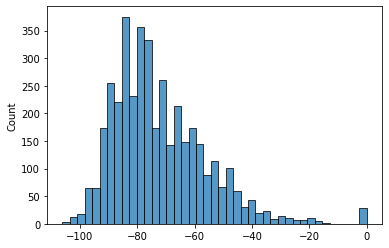

In [432]:
sns.histplot(patients.age)

<AxesSubplot:xlabel='sex', ylabel='Count'>

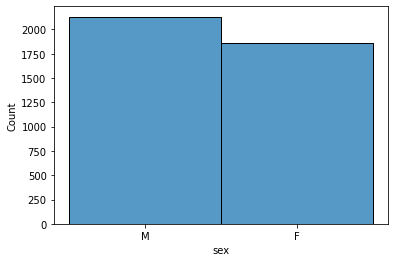

In [301]:
sns.histplot(patients.sex)

<AxesSubplot:xlabel='hospital_expire_flg', ylabel='Count'>

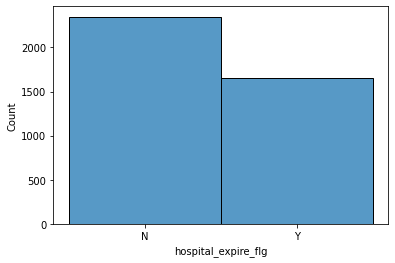

In [302]:
sns.histplot(patients.hospital_expire_flg)

### Demographic details

In [304]:
demographic_det = pd.read_csv('MIMIC2csv/demographic_detail.csv')
demographic_det.head()

,subject_id,hadm_id,marital_status_itemid,marital_status_descr,ethnicity_itemid,ethnicity_descr,overall_payor_group_itemid,overall_payor_group_descr,religion_itemid,religion_descr,admission_type_itemid,admission_type_descr,admission_source_itemid,admission_source_descr
0,56,28766,NaN,NaN,200083,WHITE,200053,MEDICARE-PRIVATE,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
1,37,18052,200050.0,MARRIED,200083,WHITE,200053,MEDICARE-PRIVATE,200047.0,JEWISH,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
2,78,15161,200071.0,SEPARATED,200018,BLACK/AFRICAN AMERICAN,200052,MEDICARE,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
3,67,35878,200072.0,SINGLE,200083,WHITE,200052,MEDICARE,200047.0,JEWISH,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
4,3,2075,200050.0,MARRIED,200083,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT


In [441]:
demographic_det.subject_id.value_counts()

10235    1
17081    1
21175    1
14851    1
25556    1
        ..
21691    1
9558     1
19138    1
9554     1
8192     1
Name: subject_id, Length: 3952, dtype: int64

In [440]:
demographic_det = demographic_det.drop_duplicates(subset='subject_id')

In [443]:
demographic_det = demographic_det.drop(['hadm_id','marital_status_itemid','ethnicity_itemid','overall_payor_group_itemid','religion_itemid','admission_type_itemid','admission_type_descr','admission_source_itemid','admission_source_descr'],axis=1)

In [444]:
demographic_det.head()

,subject_id,marital_status_descr,ethnicity_descr,overall_payor_group_descr,religion_descr
0,56,NaN,WHITE,MEDICARE-PRIVATE,NOT SPECIFIED
1,37,MARRIED,WHITE,MEDICARE-PRIVATE,JEWISH
2,78,SEPARATED,BLACK/AFRICAN AMERICAN,MEDICARE,NOT SPECIFIED
3,67,SINGLE,WHITE,MEDICARE,JEWISH
4,3,MARRIED,WHITE,MEDICARE,CATHOLIC


<AxesSubplot:xlabel='admission_type_descr', ylabel='Count'>

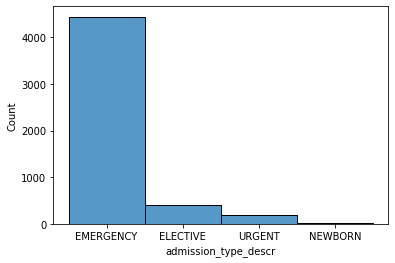

In [308]:
sns.histplot(demographic_det.admission_type_descr)

### diagnosis-related group (DRG) 

In [309]:
drg_events = pd.read_csv('MIMIC2csv/drgevents.csv')
drg_events.head()

# A diagnosis-related group (DRG) is a patient classification system that standardizes 
# prospective payment to hospitals and encourages cost containment initiatives.

,subject_id,hadm_id,itemid,cost_weight
0,3,2075,60614,1.62
1,12,12532,60305,3.42
2,21,20666,60181,3.84
3,21,20882,60614,1.67
4,26,15067,60742,5.33


In [446]:
drg_events.subject_id.value_counts()

13033    33
19213    24
15472    12
16994     9
21431     9
         ..
13260     1
27595     1
17354     1
23497     1
8192      1
Name: subject_id, Length: 3943, dtype: int64

<AxesSubplot:xlabel='cost_weight', ylabel='Count'>

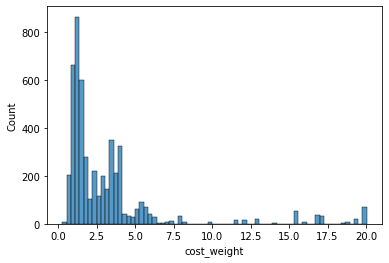

In [310]:
sns.histplot(drg_events.cost_weight)

### icu_stay details

In [492]:
icu_stay_det = pd.read_csv('MIMIC2csv/icustay_detail.csv')
icu_stay_det

,icustay_id,subject_id,gender,dob,dod,expire_flg,subject_icustay_total_num,subject_icustay_seq,hadm_id,hospital_total_num,hospital_seq,hospital_first_flg,hospital_last_flg,hospital_admit_dt,hospital_disch_dt,hospital_los,hospital_expire_flg,icustay_total_num,icustay_seq,icustay_first_flg,icustay_last_flg,icustay_intime,icustay_outtime,icustay_admit_age,icustay_age_group,icustay_los,icustay_expire_flg,icustay_first_careunit,icustay_last_careunit,icustay_first_service,icustay_last_service,height,weight_first,weight_min,weight_max,sapsi_first,sapsi_min,sapsi_max,sofa_first,sofa_min,sofa_max,matched_waveforms_num
0,62,56,F,26/5/2553 00:00:00,23/1/2644 00:00:00,Y,1,1,28766.0,1,1.0,Y,Y,17/1/2644 00:00:00,23/1/2644 00:00:00,8640.0,Y,1,1,Y,Y,17/1/2644 02:02:00,18/1/2644 22:25:00,90.64270,adult,2663,N,CCU,CCU,SICU,SICU,NaN,49.2,49.2,49.2,17.0,15.0,17.0,5.0,4.0,5.0,NaN
1,41,37,M,11/9/3195 00:00:00,31/12/3265 00:00:00,Y,1,1,18052.0,1,1.0,Y,Y,14/8/3264 00:00:00,19/8/3264 00:00:00,7200.0,N,1,1,Y,Y,16/8/3264 11:01:00,17/8/3264 14:22:00,68.93134,adult,1641,N,MICU,MICU,MICU,MICU,NaN,NaN,NaN,NaN,11.0,11.0,11.0,2.0,0.0,2.0,NaN
2,89,78,M,8/8/2729 00:00:00,11/3/2781 00:00:00,Y,1,1,15161.0,1,1.0,Y,Y,24/3/2778 00:00:00,27/3/2778 00:00:00,4320.0,N,1,1,Y,Y,24/3/2778 04:10:00,25/3/2778 15:55:00,48.62681,adult,2145,N,MICU,MICU,MICU,MICU,NaN,72.4,72.4,72.4,14.0,11.0,14.0,4.0,3.0,4.0,NaN
3,76,67,M,4/6/2903 00:00:00,29/11/2976 00:00:00,Y,1,1,NaN,0,NaN,N,N,NaN,NaN,NaN,NaN,1,1,Y,Y,29/11/2976 00:47:00,29/11/2976 05:56:00,73.48396,adult,309,N,FICU,FICU,FICU,FICU,165.10,65.0,64.3,65.0,NaN,NaN,NaN,5.0,5.0,5.0,NaN
4,4,3,M,28/2/2606 00:00:00,2/5/2683 00:00:00,Y,1,1,2075.0,1,1.0,Y,Y,7/9/2682 00:00:00,18/9/2682 00:00:00,15840.0,N,1,1,Y,Y,7/9/2682 18:12:00,13/9/2682 19:45:00,76.52892,adult,8733,N,MICU,MICU,MICU,MICU,179.07,96.8,96.8,108.0,28.0,7.0,28.0,14.0,1.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,47373,32667,M,19/1/2778 00:00:00,27/2/2866 00:00:00,Y,1,1,36071.0,1,1.0,Y,Y,18/2/2866 00:00:00,27/2/2866 00:00:00,12960.0,Y,1,1,Y,Y,24/2/2866 05:45:00,27/2/2866 01:11:00,88.09742,adult,4046,Y,SICU,SICU,SICU,SICU,NaN,50.0,50.0,50.0,16.0,12.0,16.0,10.0,4.0,10.0,NaN
5840,47381,32675,M,7/7/2758 00:00:00,29/4/2816 00:00:00,Y,1,1,35514.0,1,1.0,Y,Y,19/4/2816 00:00:00,29/4/2816 00:00:00,14400.0,Y,1,1,Y,Y,19/4/2816 17:02:00,29/4/2816 03:13:00,57.78417,adult,13571,Y,CSRU,CSRU,MICU,MICU,182.88,77.5,77.5,77.5,17.0,17.0,26.0,13.0,12.0,18.0,NaN
5841,47325,32627,M,4/8/2699 00:00:00,14/11/2788 00:00:00,Y,1,1,33957.0,1,1.0,Y,Y,2/11/2788 00:00:00,14/11/2788 00:00:00,17280.0,Y,1,1,Y,Y,2/11/2788 12:36:00,14/11/2788 02:33:00,89.24603,adult,16677,Y,CCU,CSRU,CCU,MICU,NaN,54.4,54.4,62.0,18.0,18.0,22.0,12.0,6.0,12.0,NaN
5842,47394,32686,M,6/12/2543 00:00:00,27/6/2612 00:00:00,Y,1,1,30102.0,1,1.0,Y,Y,27/5/2612 00:00:00,27/6/2612 00:00:00,44640.0,Y,1,1,Y,Y,31/5/2612 19:31:00,27/6/2612 17:07:00,68.48606,adult,38736,Y,CSRU,CSRU,MICU,MICU,NaN,76.6,76.6,76.6,17.0,13.0,21.0,8.0,4.0,8.0,NaN


In [493]:
icu_stay_det = icu_stay_det.drop(['dob','dod','icustay_seq','expire_flg','subject_icustay_total_num','subject_icustay_seq','hospital_total_num','hospital_seq','hospital_first_flg','hospital_last_flg','hospital_admit_dt','hospital_disch_dt','hospital_los','icustay_age_group','hospital_expire_flg','icustay_total_num','icustay_first_flg','icustay_last_flg','icustay_los','icustay_intime','icustay_outtime','icustay_expire_flg','icustay_last_careunit','icustay_first_service','icustay_last_service','weight_min','weight_max','sapsi_min','sapsi_max','sofa_min','sofa_max','matched_waveforms_num'],axis=1)

In [494]:
icu_stay_det

,icustay_id,subject_id,gender,hadm_id,icustay_admit_age,icustay_first_careunit,height,weight_first,sapsi_first,sofa_first
0,62,56,F,28766.0,90.64270,CCU,NaN,49.2,17.0,5.0
1,41,37,M,18052.0,68.93134,MICU,NaN,NaN,11.0,2.0
2,89,78,M,15161.0,48.62681,MICU,NaN,72.4,14.0,4.0
3,76,67,M,NaN,73.48396,FICU,165.10,65.0,NaN,5.0
4,4,3,M,2075.0,76.52892,MICU,179.07,96.8,28.0,14.0
...,...,...,...,...,...,...,...,...,...,...
5839,47373,32667,M,36071.0,88.09742,SICU,NaN,50.0,16.0,10.0
5840,47381,32675,M,35514.0,57.78417,CSRU,182.88,77.5,17.0,13.0
5841,47325,32627,M,33957.0,89.24603,CCU,NaN,54.4,18.0,12.0
5842,47394,32686,M,30102.0,68.48606,CSRU,NaN,76.6,17.0,8.0


<AxesSubplot:xlabel='icustay_first_careunit', ylabel='Count'>

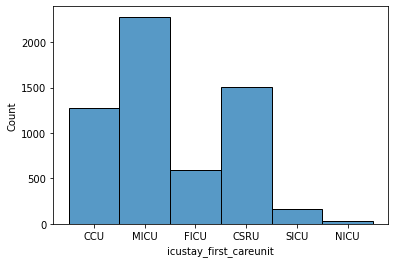

In [452]:
sns.histplot(icu_stay_det.icustay_first_careunit)

<AxesSubplot:xlabel='height', ylabel='Count'>

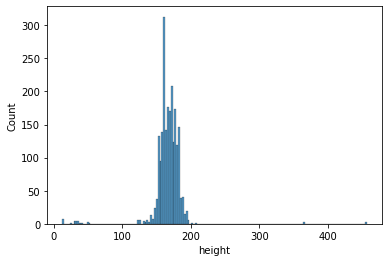

In [453]:
sns.histplot(icu_stay_det.height)

<AxesSubplot:xlabel='weight_first', ylabel='Count'>

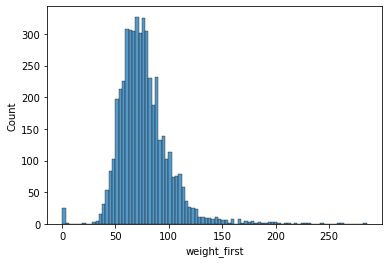

In [454]:
sns.histplot(icu_stay_det.weight_first)

<AxesSubplot:xlabel='sapsi_first', ylabel='Count'>

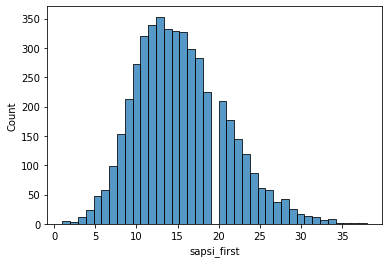

In [456]:
sns.histplot(icu_stay_det.sapsi_first)

<AxesSubplot:xlabel='sofa_first', ylabel='Count'>

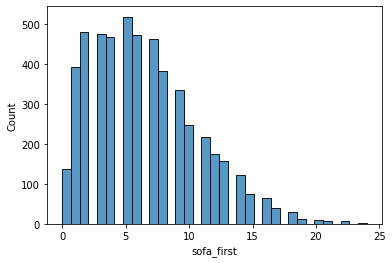

In [455]:
sns.histplot(icu_stay_det.sofa_first)

<AxesSubplot:xlabel='icustay_admit_age', ylabel='Count'>

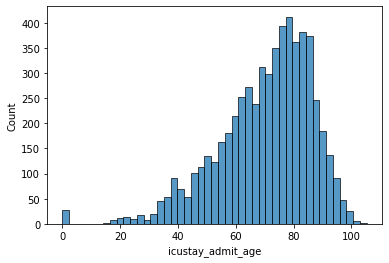

In [480]:
sns.histplot(icu_stay_det.icustay_admit_age)

### International Classification of Diseases (ICD-9)

In [204]:
icd9 = pd.read_csv('MIMIC2csv/icd9.csv')

re_ind_icd9 = icd9.set_index(['subject_id','hadm_id'])
re_ind_icd9 = re_ind_icd9.drop('code',axis=1)

re_ind_icd9.head()

# World Health Organization's Ninth Revision, International Classification 
# of Diseases (ICD-9).

sequence  \
subject_id hadm_id             
56         28766           1   
           28766           2   
           28766           3   
           28766           4   
           28766           5   

                                                          description  
subject_id hadm_id                                                     
56         28766    SECONDARY MALIGNANT NEOPLASM OF BRAIN AND SPIN...  
           28766    MALIGNANT NEOPLASM OF OTHER PARTS OF BRONCHUS ...  
           28766    CHRONIC OR UNSPECIFIED GASTRIC ULCER WITH HEMO...  
           28766                    HYPOSMOLALITY AND/OR HYPONATREMIA  
           28766                 CONGESTIVE HEART FAILURE UNSPECIFIED